# 8.1 Feature Engineering
## Feature Scaling, Encoding, Inputing
Boise State University\
Department of Computer Science\
CS 334 Algorithms of Machine Learning\
Conrad Kennington\
Fall 2020

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Feature Scaling

Machine learning algorithm just sees number — if there is a vast difference in the range say few ranging in thousands and few ranging in the tens, and it makes the underlying assumption that higher ranging numbers have superiority of some sort. So these more significant number starts playing a more decisive role while training the model.

Feature scaling in machine learning is one of the most critical steps during the pre-processing of data before creating a machine learning model.\
Scaling can make a difference between a weak machine learning model and a better one.

Like choosing a model algorithm, which feature scaling approach works best is a matter of experimentation.

In [2]:
df = pd.DataFrame({'WEIGHT': [15, 18, 12,10],
                   'PRICE': [1,3,2,5]},
                   index = ['Orange','Apple','Banana','Grape'])
print(df)

        WEIGHT  PRICE
Orange      15      1
Apple       18      3
Banana      12      2
Grape       10      5


## Min-max scaler

Transform features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g., between zero and one.

This Scaler responds well if the standard deviation is small and when a distribution is not Gaussian. This Scaler is sensitive to outliers.

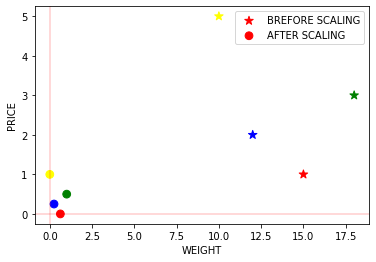

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1 = pd.DataFrame(scaler.fit_transform(df),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape'])
ax = df.plot.scatter(x='WEIGHT', y='PRICE',color=['red','green','blue','yellow'], 
                     marker = '*',s=80, label='BREFORE SCALING');
df1.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow'],
                 marker = 'o',s=60,label='AFTER SCALING', ax = ax)
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2)

## Standard Scaler

The Standard Scaler assumes data is normally distributed within each feature and scales them such that the distribution centered around 0, with a standard deviation of 1.\
Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set.\
If data is not normally distributed, this is not the best Scaler to use.

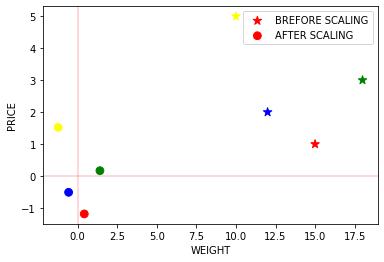

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2 = pd.DataFrame(scaler.fit_transform(df),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape'])
ax = df.plot.scatter(x='WEIGHT', y='PRICE',color=['red','green','blue','yellow'], 
                     marker = '*',s=80, label='BREFORE SCALING')
df2.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow'],
                 marker = 'o',s=60,label='AFTER SCALING', ax = ax)
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2)

## Max Abs Scaler

Scale each feature by its maximum absolute value.\
This estimator scales and translates each feature individually such that the maximal absolute value of each feature in the training set is 1.0.\
It does not shift/center the data and thus does not destroy any sparsity.\
On positive-only data, this Scaler behaves similarly to Min Max Scaler and, therefore, also suffers from the presence of significant outliers.

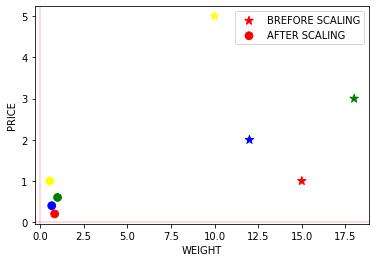

In [12]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
df4 = pd.DataFrame(scaler.fit_transform(df),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape'])
ax = df.plot.scatter(x='WEIGHT', y='PRICE',color=['red','green','blue','yellow'], 
                     marker = '*',s=80, label='BREFORE SCALING');
df4.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow'],
                 marker = 'o',s=60,label='AFTER SCALING', ax = ax)
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2)

## Robust Scaler

As the name suggests, this Scaler is robust to outliers. If our data contains many outliers, scaling using the mean and standard deviation of the data won’t work well.\
\
This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile). The centering and scaling statistics of this Scaler are based on percentiles and are therefore not influenced by a few numbers of huge marginal outliers. Note that the outliers themselves are still present in the transformed data. If a separate outlier clipping is desirable, a non-linear transformation is required.

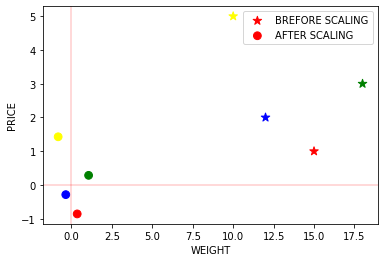

In [13]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df3 = pd.DataFrame(scaler.fit_transform(df),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape'])
ax = df.plot.scatter(x='WEIGHT', y='PRICE',color=['red','green','blue','yellow'], 
                     marker = '*',s=80, label='BREFORE SCALING');
df3.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow'],
                 marker = 'o',s=60,label='AFTER SCALING', ax = ax)
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2)

## Quantile Transformer Scaler

Transform features using quantiles information.\
\
This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is, therefore, a robust pre-processing scheme.\
\
The cumulative distribution function of a feature is used to project the original values. Note that this transform is non-linear and may distort linear correlations between variables measured at the same scale but renders variables measured at different scales more directly comparable. This is also sometimes called as Rank scaler.

/usr/local/opt/python@3.8/Frameworks/Python.framework/Versions/3.8/lib/python3.8/sklearn/preprocessing/_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (4). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


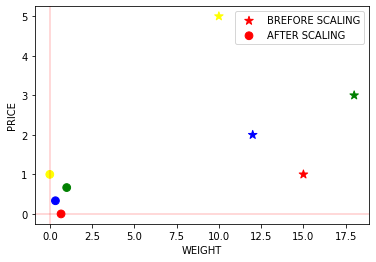

In [22]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer()
df6 = pd.DataFrame(scaler.fit_transform(df),
                   columns=['WEIGHT','PRICE'],
                   index = ['Orange','Apple','Banana','Grape'])
ax = df.plot.scatter(x='WEIGHT', y='PRICE',color=['red','green','blue','yellow'], 
                     marker = '*',s=80, label='BREFORE SCALING');
df6.plot.scatter(x='WEIGHT', y='PRICE', color=['red','green','blue','yellow'],
                 marker = 'o',s=60,label='AFTER SCALING', ax = ax,figsize=(6,4))
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2)

# Categorical to Numeric Encoding

In many Machine-learning or Data Science activities, the data set might contain text or categorical values (basically non-numerical values).\
\
For example, color feature having values like red, orange, blue, white etc. Meal plan having values like breakfast, lunch, snacks, dinner, tea etc.

There are many ways to convert categorical values into numerical values. Each approach has its own trade-offs and impact on the feature set.

## Label-Encoding

In [37]:
from sklearn.preprocessing import LabelEncoder

# creating initial dataframe
bridge_types = ('Arch','Beam','Truss','Cantilever','Tied Arch','Suspension','Cable')
bridge_df = pd.DataFrame(bridge_types, columns=['Bridge_Types'])

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
bridge_df['Bridge_Types_Cat'] = labelencoder.fit_transform(bridge_df['Bridge_Types'])
bridge_df

,Bridge_Types,Bridge_Types_Cat
0,Arch,0
1,Beam,1
2,Truss,6
3,Cantilever,3
4,Tied Arch,5
5,Suspension,4
6,Cable,2


## One hot encoding

In [42]:
# import required libraries
import pandas as pd
import numpy as np

# creating initial dataframe
bridge_types = ('Arch','Beam','Truss','Cantilever','Tied Arch','Suspension','Cable')
bridge_df = pd.DataFrame(bridge_types, columns=['Bridge_Types'])

# converting type of columns to 'category'
bridge_df['Bridge_Types'] = bridge_df['Bridge_Types'].astype('category')

# Assigning numerical values and storing in another column
bridge_df['Bridge_Types_Cat'] = bridge_df['Bridge_Types'].cat.codes
bridge_df

,Bridge_Types,Bridge_Types_Cat
0,Arch,0
1,Beam,1
2,Truss,6
3,Cantilever,3
4,Tied Arch,5
5,Suspension,4
6,Cable,2


In [39]:
from sklearn.preprocessing import OneHotEncoder

# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(bridge_df[['Bridge_Types_Cat']]).toarray())

# merge with main df bridge_df on key values
bridge_df = bridge_df.join(enc_df)
bridge_df

,Bridge_Types,Bridge_Types_Cat,0,1,2,3,4,5,6
0,Arch,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Beam,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Truss,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Cantilever,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Tied Arch,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,Suspension,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,Cable,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## One-hot using dummy values

In [36]:
# creating initial dataframe
bridge_types = ('Arch','Beam','Truss','Cantilever','Tied Arch','Suspension','Cable')
bridge_df = pd.DataFrame(bridge_types, columns=['Bridge_Types'])

# generate binary values using get_dummies
dum_df = pd.get_dummies(bridge_df, columns=["Bridge_Types"], prefix=["Type_is"])

# merge with main df bridge_df on key values
bridge_df = bridge_df.join(dum_df)
bridge_df

,Bridge_Types,Type_is_Arch,Type_is_Beam,Type_is_Cable,Type_is_Cantilever,Type_is_Suspension,Type_is_Tied Arch,Type_is_Truss
0,Arch,1,0,0,0,0,0,0
1,Beam,0,1,0,0,0,0,0
2,Truss,0,0,0,0,0,0,1
3,Cantilever,0,0,0,1,0,0,0
4,Tied Arch,0,0,0,0,0,1,0
5,Suspension,0,0,0,0,1,0,0
6,Cable,0,0,1,0,0,0,0


# Inputing

Imputation is identifying and replacing missing values from a dataset using appropriate values. 

Presence of missing values in a dataset can be caused by many possible factors such as: privacy concerns, technical faults when recording data using sensors, human errors, etc…

There are two main types of Imputation:

**Numerical Imputation**: missing numbers in numerical features can be imputed using many different techniques. Some of the main methods used, are to replace missing values with the overall mean or mode of the affected column. If you are interested in learning more about advanced techniques, you can find more information here.

**Categorical Imputation**: for categorical features, missing values are commonly replaced using the overall column mode. In some particular case, if the categorical column structure is not well defined, it might be better instead to replace the missing values creating a new category and naming it “Unknown” or “Other”.

In [70]:
import numpy as np
import pandas as pd 

# Generate 8000 rows of random data with missing samples.
dataset_len = 8000
dlen = int(dataset_len/2)
X_11 = pd.Series(np.random.normal(8,2,dlen))
X_12 = pd.Series(np.random.randint(low=0, high=100, size=dlen))
X_1 = pd.concat([X_11, X_12]).reset_index(drop=True)
X_21 = pd.Series(np.random.normal(20,3,dlen))
X_22 = pd.Series(np.random.normal(9,3,dlen))
X_2 = pd.concat([X_21, X_22]).reset_index(drop=True)
X_31 = pd.Series(np.random.normal(8,2,dlen))
X_32 = pd.Series(np.random.randint(low=0, high=300, size=dlen))
X_3 = pd.concat([X_31, X_32]).reset_index(drop=True)
X_4 = pd.Series(np.repeat(['Car', 'Bus', 'Bike', 'Scooter'],
                          dlen/2))
Y = pd.Series(np.repeat(['True','False'],dlen))
df = pd.concat([X_1, X_2, X_3, X_4, Y], axis=1)
df.columns = ['X1', 'X2', 'X3', 'X4', 'Y']
df['X1'] = df['X1'].mask(np.random.random(df['X1'].shape) < 0.22)
df[['X3', 'X4']] = df[['X3', 'X4']].mask(np.random.random(df[['X3', 
                        'X4']].shape) < 0.10)
dates = pd.date_range(start='1/1/2016', periods=len(df), freq='D')
df.insert(loc= 0, column='Date', value= dates)
df.head()

,Date,X1,X2,X3,X4,Y
0,2016-01-01,NaN,18.655155,7.865133,Car,True
1,2016-01-02,5.187388,19.388020,7.261167,Car,True
2,2016-01-03,8.700367,22.861708,7.408588,Car,True
3,2016-01-04,NaN,22.761383,7.176629,Car,True
4,2016-01-05,8.344623,22.867737,NaN,Car,True


In [68]:
# Calculate missing data percentages
percent_missing = df.isnull().sum() * 100 / len(df)
missing_values = pd.DataFrame({'NaNs percentage': percent_missing})
missing_values.sort_values(by ='NaNs percentage' , ascending=False)

,NaNs percentage
X1,22.3625
X3,10.3875
X4,9.5000
Date,0.0000
X2,0.0000
Y,0.0000


## Remove rows with nulls

Sometimes this is an acceptable option, if there's enough data in rows without nulls.

## Replace nulls with a median, max, aand most common class

In [69]:
df['X1'].fillna(df['X1'].value_counts().min(), inplace=True)    
df['X2'].fillna(df['X3'].value_counts().median(), inplace=True)   
df['X3'].fillna(df['X3'].value_counts().max(), inplace=True)
df['X4'].fillna(df['X4'].value_counts().idxmax(), inplace=True)
   
percent_missing = df.isnull().sum() * 100 / len(df)
missing_values = pd.DataFrame({'NaNs percentage': percent_missing})
missing_values.sort_values(by ='NaNs percentage' , ascending=False)

,NaNs percentage
Date,0.0
X1,0.0
X2,0.0
X3,0.0
X4,0.0
Y,0.0


# Class Balance